In [10]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt   
from matplotlib import style
import os
import webbrowser

In [2]:
style.use('ggplot')

tickers = ['ASML', 'AMZN', 'GOOGL', 'MSFT', 'PANW', 'BKNG', 'RACE', 'COST', 'MA', 'V', 'AVGO', 'UNH']
start_date = dt.datetime(2021, 1, 1)
end_date = dt.datetime(2025, 7, 1)
number_of_portfolios = 25000
risk_free_rate = 0.024  # Example risk-free rate, adjust as needed




returns = pd.DataFrame()
for ticker in tickers:
    try:
        company_name = yf.Ticker(ticker).info.get('longName', ticker)
        print(f"Downloaded data for: {company_name} ({ticker})")
    except Exception as e:
        print(f"Downloaded data for: {ticker} (company name unavailable)")

    data = yf.download(ticker, start_date, end_date, auto_adjust=False)
    data = pd.DataFrame(data)
    data[ticker] = np.log(data['Adj Close'].pct_change() + 1)

    if returns.empty:
        returns = data[[ticker]]
    else:
        returns = returns.join(data[[ticker]], how='outer')

print(returns.head())

Downloaded data for: ASML Holding N.V. (ASML)


[*********************100%***********************]  1 of 1 completed


Downloaded data for: Amazon.com, Inc. (AMZN)


[*********************100%***********************]  1 of 1 completed


Downloaded data for: Alphabet Inc. (GOOGL)


[*********************100%***********************]  1 of 1 completed


Downloaded data for: Microsoft Corporation (MSFT)


[*********************100%***********************]  1 of 1 completed


Downloaded data for: Palo Alto Networks, Inc. (PANW)


[*********************100%***********************]  1 of 1 completed


Downloaded data for: Booking Holdings Inc. (BKNG)


[*********************100%***********************]  1 of 1 completed


Downloaded data for: Ferrari N.V. (RACE)


[*********************100%***********************]  1 of 1 completed


Downloaded data for: Costco Wholesale Corporation (COST)


[*********************100%***********************]  1 of 1 completed


Downloaded data for: Mastercard Incorporated (MA)


[*********************100%***********************]  1 of 1 completed


Downloaded data for: Visa Inc. (V)


[*********************100%***********************]  1 of 1 completed


Downloaded data for: Broadcom Inc. (AVGO)


[*********************100%***********************]  1 of 1 completed


Downloaded data for: UnitedHealth Group Incorporated (UNH)


[*********************100%***********************]  1 of 1 completed

Price           ASML      AMZN     GOOGL      MSFT      PANW      BKNG  \
Ticker                                                                   
Date                                                                     
2021-01-04       NaN       NaN       NaN       NaN       NaN       NaN   
2021-01-05  0.010663  0.009955  0.008032  0.000964 -0.004303  0.011024   
2021-01-06 -0.030417 -0.025212 -0.009917 -0.026271 -0.014006  0.027826   
2021-01-07  0.022610  0.007549  0.029431  0.028060  0.050350 -0.004437   
2021-01-08  0.014473  0.006475  0.013152  0.006074  0.009429  0.018441   

Price           RACE      COST        MA         V      AVGO       UNH  
Ticker                                                                  
Date                                                                    
2021-01-04       NaN       NaN       NaN       NaN       NaN       NaN  
2021-01-05 -0.004105 -0.011668 -0.011647 -0.015037  0.006750 -0.013539  
2021-01-06 -0.019338 -0.015341  0.000374 -


Portfolio 1
  Weights:         [0.08, 0.087, 0.026, 0.094, 0.077, 0.154, 0.016, 0.012, 0.05, 0.168, 0.091, 0.146]
  Return:          0.1628
  Risk (Std Dev):  0.2123
  Sharpe Ratio:    0.6538

Portfolio 2
  Weights:         [0.18, 0.071, 0.021, 0.009, 0.114, 0.162, 0.012, 0.138, 0.122, 0.085, 0.011, 0.074]
  Return:          0.1601
  Risk (Std Dev):  0.2225
  Sharpe Ratio:    0.6117

Portfolio 3
  Weights:         [0.084, 0.012, 0.057, 0.172, 0.133, 0.045, 0.152, 0.011, 0.008, 0.167, 0.108, 0.051]
  Return:          0.1976
  Risk (Std Dev):  0.2216
  Sharpe Ratio:    0.7833

Portfolio 4
  Weights:         [0.109, 0.156, 0.132, 0.074, 0.128, 0.026, 0.042, 0.087, 0.154, 0.006, 0.02, 0.066]
  Return:          0.1539
  Risk (Std Dev):  0.2271
  Sharpe Ratio:    0.5719

Portfolio 5
  Weights:         [0.143, 0.127, 0.001, 0.03, 0.076, 0.084, 0.01, 0.121, 0.103, 0.085, 0.081, 0.142]
  Return:          0.1556
  Risk (Std Dev):  0.2162
  Sharpe Ratio:    0.609

Portfolio 6
  Weights:         

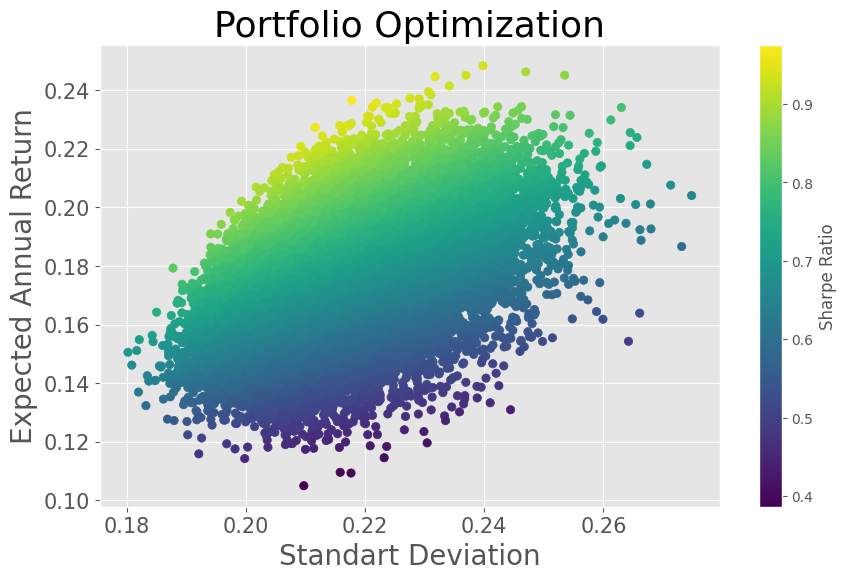

In [3]:
portfolio_annual_returns = []
portfolio_risk = []
sharpe_ratio = []
portfolio_weights = []
portfolio_volatility = []


returns_data = returns.copy()  # preserve the original DataFrame

for portfolio in range(number_of_portfolios):
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)
    portfolio_weights.append(weights)
    
    # Calculate expected return
    portfolio_annual_return = np.sum(returns_data.mean() * weights) * 252
    portfolio_annual_returns.append(portfolio_annual_return)

    # Use the DataFrame for covariance
    matrix_covariance = returns_data.cov() * 252
    portfolio_variance = np.dot(weights.T, np.dot(matrix_covariance, weights))
    portfolio_std_dev = np.sqrt(portfolio_variance)
    portfolio_risk.append(portfolio_std_dev)

    # Sharpe Ratio
    sharpe = (portfolio_annual_return - risk_free_rate) / portfolio_std_dev
    sharpe_ratio.append(sharpe)


portfolio_annual_returns = np.array(portfolio_annual_returns)
portfolio_risk = np.array(portfolio_risk)
sharpe_ratio = np.array(sharpe_ratio)
    
# Print portfolio stats
for i in range(number_of_portfolios):
    clean_weights = [round(float(w), 3) for w in portfolio_weights[i]]
    ret = round(float(portfolio_annual_returns[i]), 4)
    risk = round(float(portfolio_risk[i]), 4)
    sharpe = round(float(sharpe_ratio[i]), 4)

    print(f"\nPortfolio {i+1}")
    print("  Weights:        ", clean_weights)
    print("  Return:         ", ret)
    print("  Risk (Std Dev): ", risk)
    print("  Sharpe Ratio:   ", sharpe)
    

portfolio_metrics = [portfolio_annual_returns, portfolio_risk, sharpe_ratio, portfolio_weights] 

portfolio_df = pd.DataFrame(portfolio_metrics).T
portfolio_df.columns = ['Returns', 'Risk', 'Sharpe Ratio', 'Weights']
portfolio_df['Weights'] = portfolio_df['Weights'].apply(lambda x: [round(float(w), 3) for w in x])
print("\nPortfolio DataFrame:")
print(portfolio_df)

min_risk = portfolio_df.iloc[portfolio_df['Risk'].astype(float).idxmin()]
highest_return = portfolio_df.iloc[portfolio_df['Returns'].astype(float).idxmax()]
highest_sharpe = portfolio_df.iloc[portfolio_df['Sharpe Ratio'].astype(float).idxmax()]

print("\nMinimum Risk Portfolio:")
print(min_risk)
print(tickers)
print("\nHighest Return Portfolio:")
print(highest_return)
print(tickers)
print("\nHighest Sharpe Ratio Portfolio:")
print(highest_sharpe)
print(tickers)

plt.figure(figsize=(10, 6))
plt.scatter(portfolio_risk, portfolio_annual_returns, c=sharpe_ratio, cmap='viridis', marker='o')
plt.title('Portfolio Optimization', fontsize=26) 
plt.xlabel('Standart Deviation', fontsize=20)
plt.ylabel('Expected Annual Return',fontsize=20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.colorbar(label='Sharpe Ratio')
plt.savefig("portfolio_plot.png")  # Save plot to file instead of showing it
plt.show()
plt.close()



# https://colab.research.google.com/github/dcajasn/Riskfolio-Lib/blob/master/examples/Tutorial%206%20-%20Portfolio%20Optimization%20with%20Custom%20Parameters.ipynb

C:\Users\rodri\AppData\Local\Temp\ipykernel_23940\2697587483.py:40: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\rodri\AppData\Local\Temp\ipykernel_23940\2697587483.py:41: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(f"{export_name}.png")
c:\Users\rodri\OneDrive\Desktop\Portfolio_analaysis\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


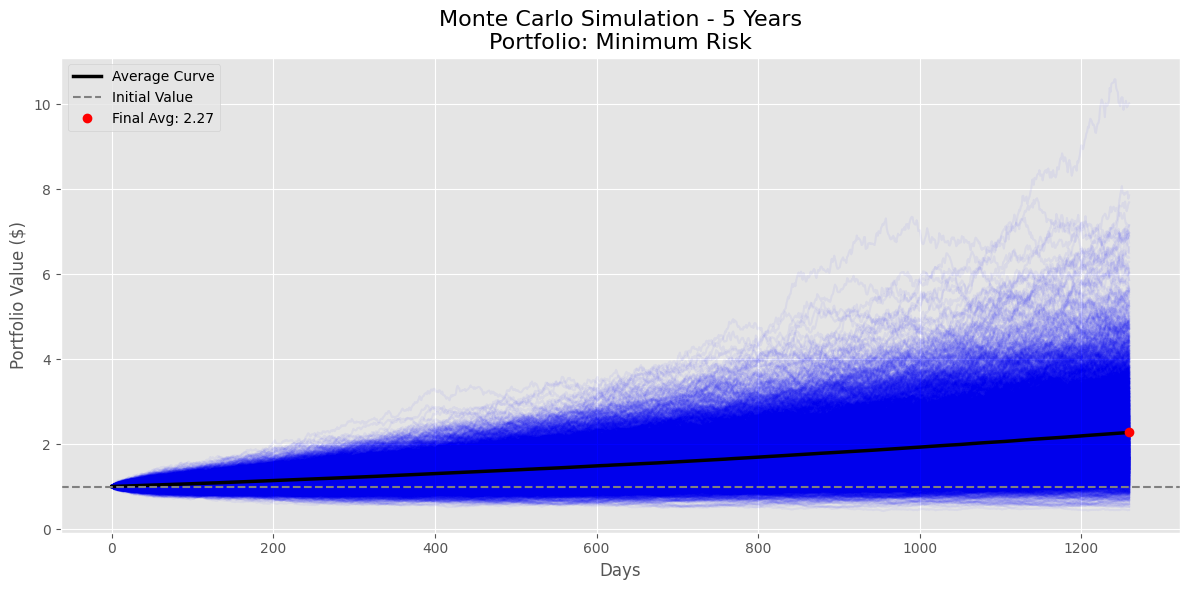

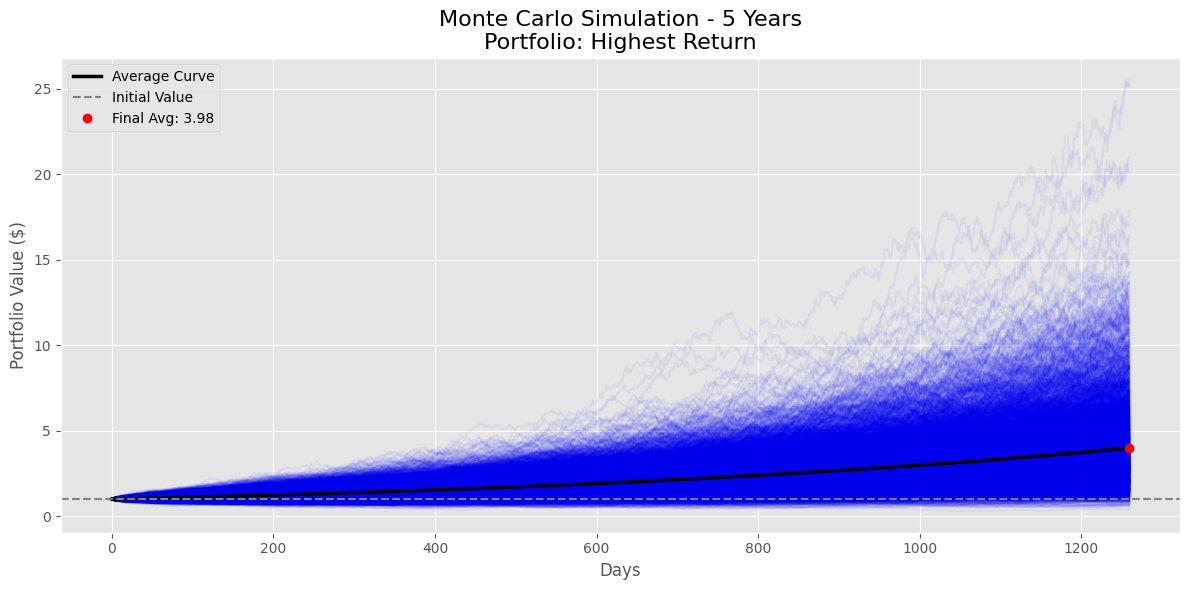

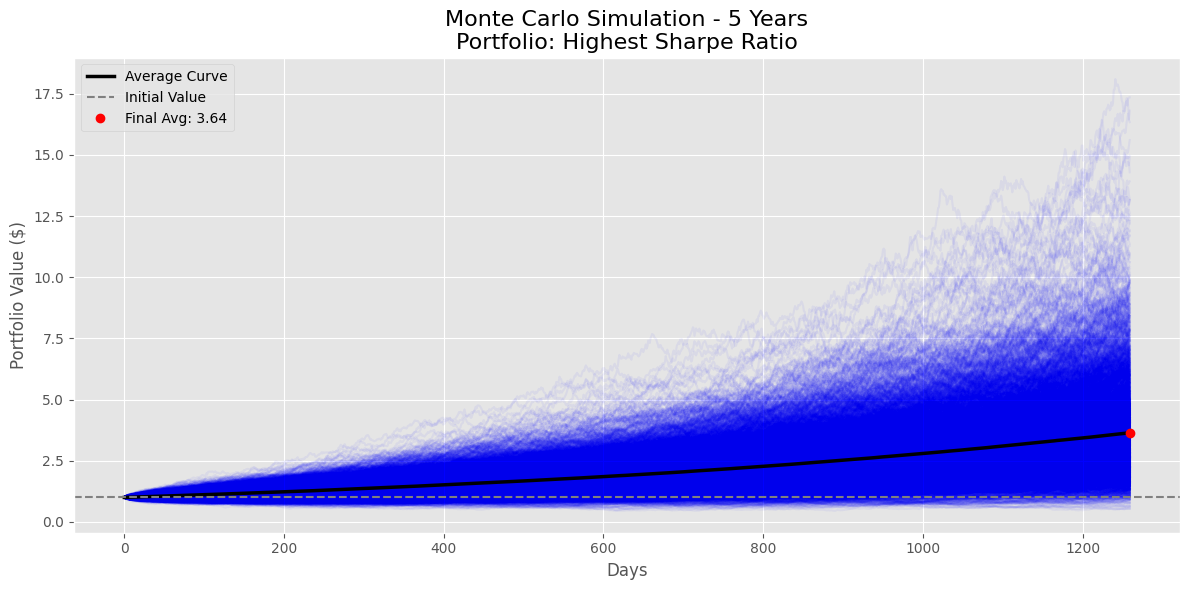

In [4]:
# Use these if variables are already defined in your notebook:
sharpe_mu, sharpe_sigma = float(highest_sharpe['Returns']), float(highest_sharpe['Risk'])
return_mu, return_sigma = float(highest_return['Returns']), float(highest_return['Risk'])
risk_mu, risk_sigma = float(min_risk['Returns']), float(min_risk['Risk'])

# Simulation Settings
initial_value = 1
years = 5
n_simulations = 5000
n_steps = years * 252

def simulate_portfolio(mu, sigma, label, export_name):
    sims = np.zeros((n_steps, n_simulations))
    sims[0] = initial_value

    for sim in range(n_simulations):
        for t in range(1, n_steps):
            shock = np.random.normal(loc=(mu / 252), scale=(sigma / np.sqrt(252)))
            sims[t, sim] = sims[t - 1, sim] * np.exp(shock)

    avg_curve = np.mean(sims, axis=1)
    final_max = avg_curve[-1]

    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(sims, alpha=0.05, color='blue')
    plt.plot(avg_curve, color='black', linewidth=2.5, label='Average Curve')

    # Add horizontal dashed line at 1.0 (initial)
    plt.axhline(y=initial_value, color='gray', linestyle='--', linewidth=1.5, label='Initial Value')

    # Add red dot at final average value
    plt.plot(n_steps - 1, final_max, 'ro', label=f'Final Avg: {final_max:.2f}')

    plt.title(f"Monte Carlo Simulation - {years} Years\nPortfolio: {label}", fontsize=16)
    plt.xlabel("Days")
    plt.ylabel("Portfolio Value ($)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"{export_name}.png")
    plt.show()
    plt.close()

    return sims, avg_curve

# Run for all three portfolios
sims_risk, avg_risk = simulate_portfolio(risk_mu, risk_sigma, "Minimum Risk", "Minimum_Risk_monte_carlo")
sims_return, avg_return = simulate_portfolio(return_mu, return_sigma, "Highest Return", "Highest_Return_monte_carlo")
sims_sharpe, avg_sharpe = simulate_portfolio(sharpe_mu, sharpe_sigma, "Highest Sharpe Ratio", "Highest_Sharpe_Ratio_monte_carlo")


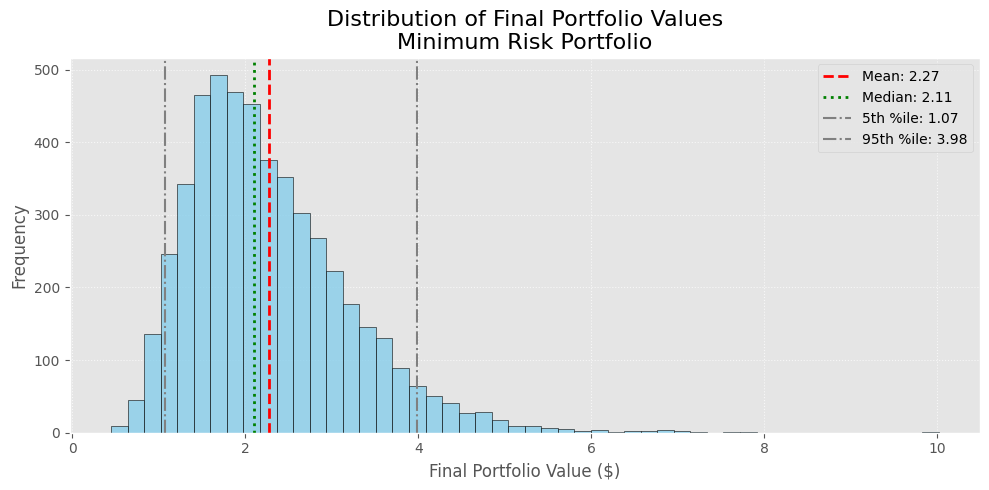

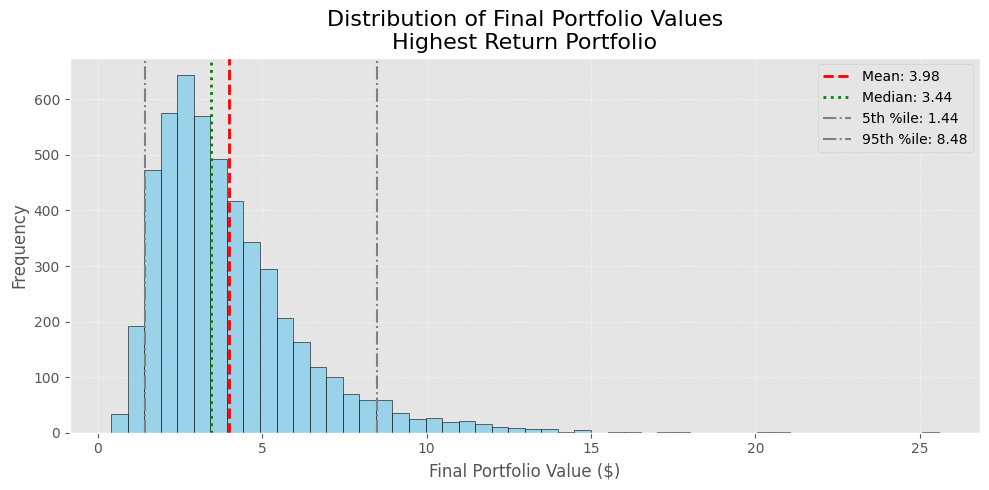

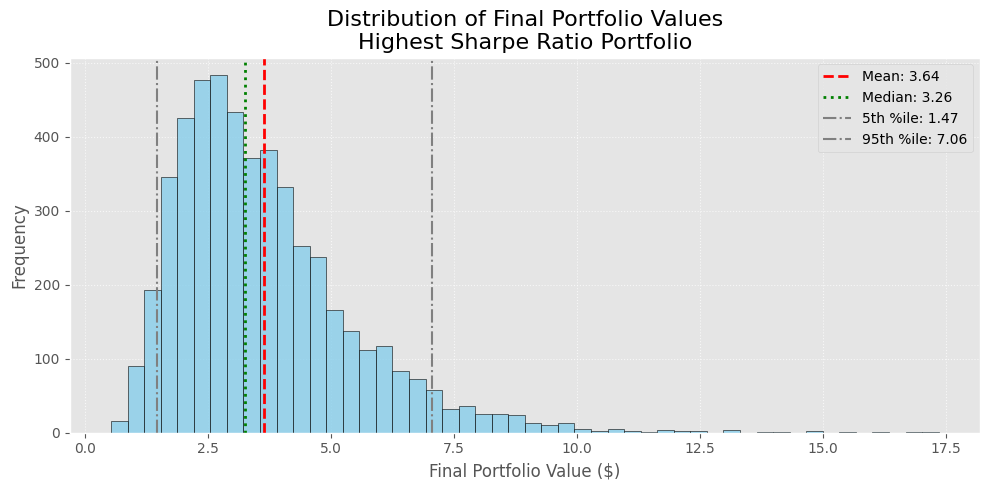

In [5]:
def plot_final_distribution(simulations, label, export_name):
    final_values = simulations[-1]  # Final day of all simulations
    mean_val = np.mean(final_values)
    median_val = np.median(final_values)
    p5, p95 = np.percentile(final_values, [5, 95])

    plt.figure(figsize=(10, 5))
    plt.hist(final_values, bins=50, color='skyblue', edgecolor='black', alpha=0.8)

    # Add lines
    plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f"Mean: {mean_val:.2f}")
    plt.axvline(median_val, color='green', linestyle=':', linewidth=2, label=f"Median: {median_val:.2f}")
    plt.axvline(p5, color='gray', linestyle='-.', linewidth=1.5, label=f"5th %ile: {p5:.2f}")
    plt.axvline(p95, color='gray', linestyle='-.', linewidth=1.5, label=f"95th %ile: {p95:.2f}")

    # Format
    plt.title(f"Distribution of Final Portfolio Values\n{label}", fontsize=16)
    plt.xlabel("Final Portfolio Value ($)")
    plt.ylabel("Frequency")
    plt.grid(True, linestyle=':', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"{export_name}.png")
    plt.show()
    plt.close()


plot_final_distribution(sims_risk, "Minimum Risk Portfolio", "Minimum_Risk_distribution")
plot_final_distribution(sims_return, "Highest Return Portfolio", "Highest_Return_distribution")
plot_final_distribution(sims_sharpe, "Highest Sharpe Ratio Portfolio", "Highest_Sharpe_Ratio_distribution")

In [13]:
def format_portfolio_row(name, portfolio, tickers):
    weights = [round(float(w), 3) for w in portfolio['Weights']]
    
    # Transpose weights into a 1-row table
    table_header = "<tr>" + "".join(f"<th>{t}</th>" for t in tickers) + "</tr>"
    table_row = "<tr>" + "".join(f"<td>{w}</td>" for w in weights) + "</tr>"
    
    return f"""
    <h3>{name}</h3>
    <p><strong>Return:</strong> {round(float(portfolio['Returns']), 4)}</p>
    <p><strong>Risk:</strong> {round(float(portfolio['Risk']), 4)}</p>
    <p><strong>Sharpe Ratio:</strong> {round(float(portfolio['Sharpe Ratio']), 4)}</p>
    <p><strong>Weights:</strong></p>
    <table>{table_header}{table_row}</table>
    <hr>
    """

# --- Generate full HTML content ---
html_content = f"""
<html>
<head>
    <title>Portfolio Optimization Report</title>
    <style>
        body {{ font-family: Arial, sans-serif; margin: 40px; }}
        h1 {{ color: #2c3e50; }}
        table {{ border-collapse: collapse; width: 100%; margin-bottom: 40px; }}
        th, td {{ border: 1px solid #ccc; padding: 8px; text-align: center; }}
        th {{ background-color: #f4f4f4; }}
        ul {{ list-style-type: none; padding: 0; }}
    </style>
</head>
<body>
    <h1>Portfolio Optimization Report</h1>

    <h2>Tickers Used</h2>
    <p>{", ".join(tickers)}</p>

    <h2>Parameters</h2>
    <ul>
        <li><strong>Start Date:</strong> {start_date.strftime('%Y-%m-%d')}</li>
        <li><strong>End Date:</strong> {end_date.strftime('%Y-%m-%d')}</li>
        <li><strong>Number of Portfolios Simulated:</strong> {number_of_portfolios}</li>
        <li><strong>Risk-Free Rate:</strong> {risk_free_rate:.2%}</li>
    </ul>

    <h2>Top Portfolios</h2>
    {format_portfolio_row("Minimum Risk Portfolio", min_risk, tickers)}
    {format_portfolio_row("Highest Return Portfolio", highest_return, tickers)}
    {format_portfolio_row("Highest Sharpe Ratio Portfolio", highest_sharpe, tickers)}

    <h2>Efficient Frontier Plot</h2>
    <img src="portfolio_plot.png" width="800">

    <h2>Monte Carlo Simulations</h2>
    <p>Each plot below shows <strong>{n_simulations}</strong> simulated future paths of the portfolio's value over <strong>{years}</strong> years, based on historical return and volatility. The bold black curve represents the average expected growth. The dashed gray line marks the initial investment. A red dot shows the final average value at the end of the period.</p>

    <h3>Minimum Risk Portfolio</h3>
    <img src="Minimum_Risk_monte_carlo.png" width="800">

    <h3>Highest Return Portfolio</h3>
    <img src="Highest_Return_monte_carlo.png" width="800">

    <h3>Highest Sharpe Ratio Portfolio</h3>
    <img src="Highest_Sharpe_Ratio_monte_carlo.png" width="800">


    <hr>

    <h2>Final Portfolio Value Distributions</h2>
    <p>The histograms below show the distribution of ending values across all Monte Carlo simulations. Key statistical markers are shown:</p>
    <ul>
      <li><strong>Red dashed line</strong>: Mean final value</li>
      <li><strong>Green dotted line</strong>: Median final value</li>
      <li><strong>Gray dash-dot lines</strong>: 5th and 95th percentiles</li>
    </ul>

    <h3>Minimum Risk Portfolio</h3>
    <img src="Minimum_Risk_distribution.png" width="800">

    <h3>Highest Return Portfolio</h3>
    <img src="Highest_Return_distribution.png" width="800">

    <h3>Highest Sharpe Ratio Portfolio</h3>
    <img src="Highest_Sharpe_Ratio_distribution.png" width="800">

</body>
</html>
"""

# Save to file
report_name = "portfolio_report.html"
with open(report_name, "w") as f:
    f.write(html_content)

print(f"✅ HTML report saved as {report_name}")

report_path = os.path.abspath(report_name)

# Open in default browser (or Chrome if set as default)
webbrowser.open(f"file://{report_path}")


✅ HTML report saved as portfolio_report.html


True